number of training data:  14308
number of test data:  188
Index(['age', 'languages', 'contract_type', 'average_gpa', 'work_interval'], dtype='object')
accuracy :  0.5957446808510638
col_0         2   3
steps_title        
2            18  76
3             0  94


Text(0.5, 0, 'Random Forest Feature Importance')

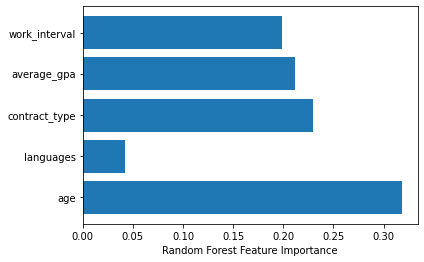

In [200]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import mysql.connector
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold, cross_val_predict

# from sklearn.naive_bayes import GaussianNB accuracy = 50%



with open('pss.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
password = lines[0]
db = lines[1]

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password=password,
    database=db,
    use_pure=True
)

my_cursor = mydb.cursor()
steps_title_list = []
d_steps_title = {}
university_name_list = []
d_uni_name = {}

def convert_nans(df):
    # job_applicant_id,gender,age,marriage_status,language,degree,skill,num_prev_company,work_interval,steps_title
    df['steps_title'] = df['steps_title'].fillna(6)
    df['age'] = df['age'].fillna(-1)
    df['skill'] = df['skill'].fillna(-1)
    df['marriage_status'] = df['marriage_status'].fillna(-1)
    # df['language'] = df['language'].fillna(-1)
    # df['job_contract_type'] = df['job_contract_type'].fillna(-1)
    df['gender'] = df['gender'].fillna(-1)
    df['degree'] = df['degree'].fillna(-1)
    df['skill'] = df['skill'].fillna(-1)
    df['num_prev_company'] = df['num_prev_company'].fillna(-1)
    df['work_interval'] = df['work_interval'].fillna(-1)





my_cursor.execute('select distinct steps_title from useful_data')
for item in my_cursor:
    steps_title_list.append(item)


for title in steps_title_list:
    if title[0] == 'نیازمند تعیین وضعیت':
        d_steps_title[title[0]] = 0
    elif title[0] == 'تایید برای مصاحبه':
        d_steps_title[title[0]] = 1
    elif title[0] == 'استخدام شده':
        d_steps_title[title[0]] = 2
    elif title[0] == 'رد شده':
        d_steps_title[title[0]] = 3
    elif title[0] == 'انصراف از مصاحبه':
        d_steps_title[title[0]] = 4
    else:
        d_steps_title[title[0]] = 6

np.random.seed(0)
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train['steps_title'] = df_train['steps_title'].map(d_steps_title)
df_test['steps_title'] = df_test['steps_title'].map(d_steps_title)
convert_nans(df_train)
convert_nans(df_test)
print('number of training data: ' , len(df_train))
print('number of test data: ' , len(df_test))
features_train = df_train.columns[[2 , 4 , 5 , 7 , 10]]
features_test = df_test.columns[[2 , 4 , 5 , 7 , 10]]
print(features_test)
clf = RandomForestClassifier(n_jobs=2 , random_state=0)
clf.fit(df_train[features_train] , df_train['steps_title'])
y = clf.predict(df_test[features_test])
x = df_test['steps_title']
print("accuracy : ", accuracy_score(x, y))
print(pd.crosstab(x, y))
sorted_idx = clf.feature_importances_
plt.barh(features_test, clf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")